<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/Assignment_assoc_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gro_list = pd.read_csv("/content/Groceries_dataset.csv")
gro_list

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
gro_list.ndim

2

In [4]:
gro_list.size

116295

In [5]:
gro_list.shape

(38765, 3)

In [6]:
gro_list.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [7]:
gro_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
gro_list.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [9]:
gro_list.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
# Get unique values in the itemDescription column
unique_item_descriptions = gro_list['itemDescription'].unique()

# Print the unique values
print("Unique values in 'itemDescription' column:")
for item in unique_item_descriptions:
    print(item)

Unique values in 'itemDescription' column:
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female

In [11]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [12]:
#Step 1: Convert Date to datetime format
gro_list['Date'] = pd.to_datetime(gro_list['Date'], format='%d-%m-%Y')
print("Step 1: Converted 'Date' to datetime format:")
print(gro_list.head(), "\n")

Step 1: Converted 'Date' to datetime format:
   Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Step 2: Create a unique basket ID by combining 'Member_number' and 'Date'
gro_list['basket_id'] = gro_list['Member_number'].astype(str) + '_' + gro_list['Date'].dt.strftime('%d-%m-%Y')
print("Step 2: Created 'basket_id' by combining 'Member_number' and 'Date':")
print(gro_list.head(), "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step 2: Created 'basket_id' by combining 'Member_number' and 'Date':
   Member_number       Date   itemDescription        basket_id
0           1808 2015-07-21    tropical fruit  1808_21-07-2015
1           2552 2015-01-05        whole milk  2552_05-01-2015
2           2300 2015-09-19         pip fruit  2300_19-09-2015
3           1187 2015-12-12  other vegetables  1187_12-12-2015
4           3037 2015-02-01        whole milk  3037_01-02-2015 



In [14]:
# Step 3: One-hot encode the itemDescription column
basket = pd.get_dummies(gro_list.set_index('basket_id')['itemDescription']).reset_index()
basket = basket.groupby('basket_id').sum()
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
basket_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Ensure values are binary (0 or 1) since apriori algoritm works for binary data
basket = basket.clip(upper=1)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
basket_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(whole milk, soda)"


In [17]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525


In [18]:
rules.sort_values('lift',ascending = False)[0:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

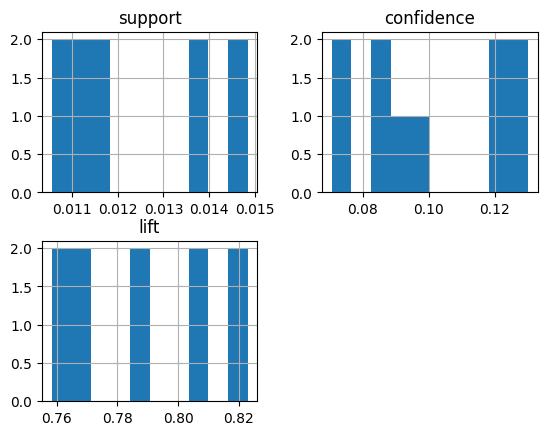

In [19]:
rules[['support','confidence','lift']].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


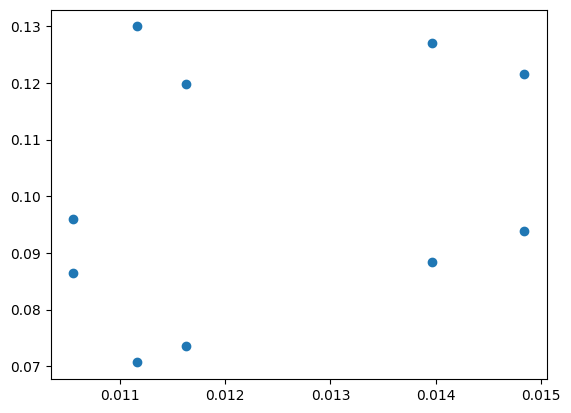

In [20]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

#Insight and Conclusion


The market basket analysis reveals that certain item pairs are less likely to be purchased together. Customers who buy rolls/buns are less likely to buy other vegetables, and this pattern holds true in reverse as well. Similarly, those who purchase other vegetables are less likely to buy whole milk, and vice versa. The analysis also shows a weaker but consistent trend where rolls/buns and whole milk, as well as whole milk and soda, are not typically bought together. Furthermore, yogurt and whole milk also exhibit a negative correlation.

These insights suggest that store layouts should place these items further apart to encourage customers to explore different sections. Promotions should avoid bundling items that are not typically bought together, and inventory management strategies should consider these buying patterns to optimize stock levels.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
